### Creating a graph


In [ ]:
pip install scipy==1.8.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.6 MB 1.7 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [ ]:
pip install networkx==2.8.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 9.3 MB/s 
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy.linalg import matrix_rank
import math
import numpy as np
from scipy.sparse.linalg import eigs
import copy
from numpy.linalg import eig
import scipy
import scipy.linalg

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('star-wars-network-edges.csv')
df1 = df[['source', 'target']]

In [ ]:
G = nx.from_pandas_edgelist(df1,'source','target')

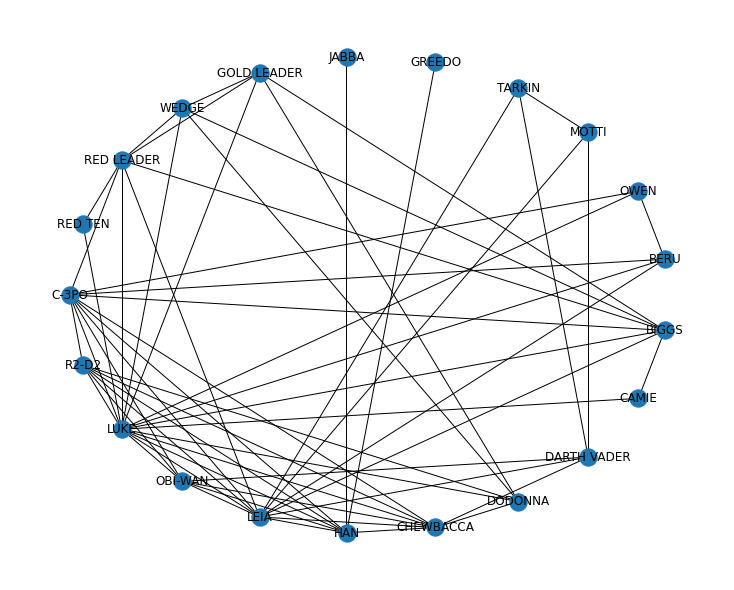

In [ ]:
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [ ]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0]
 [1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1]
 [1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0]
 [1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0]
 [1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


### Exact algorithm

In [ ]:
X = []
k = 5
tempG = G.copy()

In [ ]:
def Connectivity(graph):
  A = nx.adjacency_matrix(graph)
  r = matrix_rank(A.todense())
  vals,v = eig(A.todense())
  # vals = nx.adjacency_spectrum(graph)
  sorted(vals,reverse = True)
  vals = vals[:r]
  # Using natural connectivity as the connectivity measure
  sum = 0
  for val in vals:
    sum += math.exp(val)
  nc = sum/len(vals)
  return nc

In [ ]:
Connectivity(G)

110.56696786664698

In [ ]:
if __name__ == '__main__':
  I1 = 0
  for j in range(0,k):
    I = {}
    for node in list(tempG.nodes()):
      G1 = tempG.copy()
      G1.remove_node(node)
      I[node] =  Connectivity(tempG) - Connectivity(G1)

    Nodemax = max(I, key= lambda x: I[x], default = 0)
    I1 += I[Nodemax]
    print("Node with highest impact score is "+ str(Nodemax) + ". Its impact score is "+ str(I[Nodemax]))
    X.append(Nodemax)
    tempG.remove_node(Nodemax)

  print(X)
  print("Total impact scores of removed nodes = "+ str(I1))

Node with highest impact score is LUKE. Its impact score is 82.06101536599473
Node with highest impact score is LEIA. Its impact score is 18.551775002156653
Node with highest impact score is C-3PO. Its impact score is 4.271962032067338
Node with highest impact score is CHEWBACCA. Its impact score is 1.5815796967817866
Node with highest impact score is GOLD LEADER. Its impact score is 1.1834309238051683
['LUKE', 'LEIA', 'C-3PO', 'CHEWBACCA', 'GOLD LEADER']
Total impact scores of removed nodes = 107.64976302080568


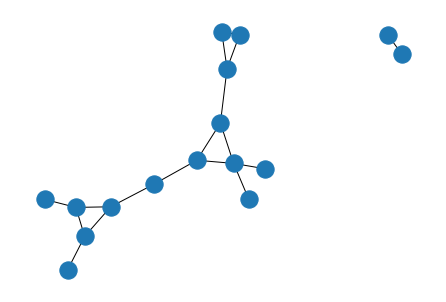

In [ ]:
nx.draw(tempG)
plt.show()

### Degree Algorithm

In [ ]:
X = []
k = 5
tempdegree = G.copy()

In [ ]:
degrees = {}
I2 = 0
for node in G.nodes():
  degrees[node] = G.degree(node)
for j in range(k):
  I = {}
  for node in list(tempdegree.nodes()):
      G1 = tempdegree.copy()
      G1.remove_node(node)
      I[node] =  Connectivity(tempdegree) - Connectivity(G1)
  Nodemax = max(degrees, key= lambda x: degrees[x], default = 0)
  I2 += I[Nodemax]
  print("Node with highest impact score is "+ str(Nodemax))
  X.append(Nodemax)
  tempdegree.remove_node(Nodemax)
  del degrees[Nodemax]
print(X)

Node with highest impact score is LUKE
Node with highest impact score is LEIA
Node with highest impact score is C-3PO
Node with highest impact score is HAN
Node with highest impact score is CHEWBACCA
['LUKE', 'LEIA', 'C-3PO', 'HAN', 'CHEWBACCA']


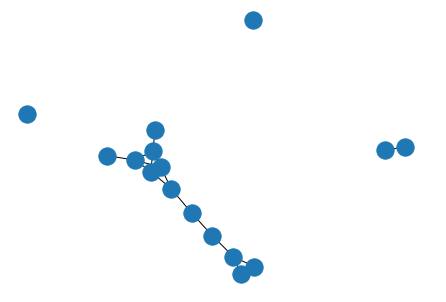

In [ ]:
nx.draw(tempdegree)
plt.show()

### PageRank Scores

In [ ]:
X = []
k = 5
temppr = G.copy()

In [ ]:
pr = nx.pagerank(temppr, alpha=0.9)
I3 = 0

In [ ]:
for j in range(k):
  I = {}
  for node in list(temppr.nodes()):
      G1 = temppr.copy()
      G1.remove_node(node)
      I[node] =  Connectivity(temppr) - Connectivity(G1)
  Nodemax = max(pr, key= lambda x: pr[x], default = 0)
  I3 += I[Nodemax]
  print("Node with highest impact score is "+ str(Nodemax))
  X.append(Nodemax)
  temppr.remove_node(Nodemax)
  del pr[Nodemax]
print(X)

Node with highest impact score is LUKE
Node with highest impact score is LEIA
Node with highest impact score is C-3PO
Node with highest impact score is HAN
Node with highest impact score is CHEWBACCA
['LUKE', 'LEIA', 'C-3PO', 'HAN', 'CHEWBACCA']


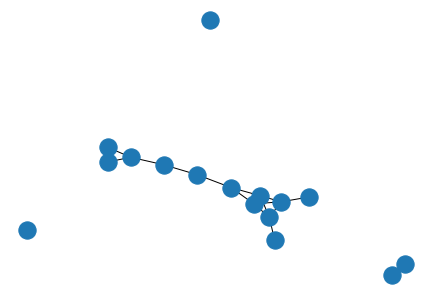

In [ ]:
nx.draw(tempdegree)
plt.show()

### Eigen vector centrality scores

In [ ]:
X = []
k = 5
tempecs = G.copy()

In [ ]:
centrality = nx.eigenvector_centrality(tempecs)
I4 = 0

In [ ]:
for j in range(k):
  I = {}
  for node in list(tempecs.nodes()):
      G1 = tempecs.copy()
      G1.remove_node(node)
      I[node] =  Connectivity(tempecs) - Connectivity(G1)
  Nodemax = max(centrality, key= lambda x: centrality[x], default = 0)
  I4 += I[Nodemax]
  print("Node with highest impact score is "+ str(Nodemax))
  X.append(Nodemax)
  tempecs.remove_node(Nodemax)
  del centrality[Nodemax]
print(X)

Node with highest impact score is LUKE
Node with highest impact score is LEIA
Node with highest impact score is C-3PO
Node with highest impact score is CHEWBACCA
Node with highest impact score is R2-D2
['LUKE', 'LEIA', 'C-3PO', 'CHEWBACCA', 'R2-D2']


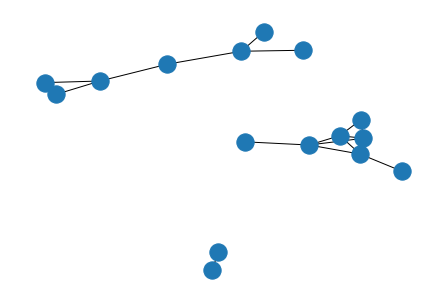

In [ ]:
nx.draw(tempecs)
plt.show()

### Netshield algorithm

In [ ]:
X = []
k = 5
tempns = G.copy()

In [ ]:
def netshield(adj_mat, k):
    n = adj_mat.shape
    n = n[0]
    B = []

    csr = adj_mat.tocsr()
    eig_val, eig_vecs  = eigs(adj_mat, k=1)
    u = eig_vecs
    csr = adj_mat.tocsr()
    diag = []
    for j in range(0,n):
        row = csr[j,:]
        row = row.A
        diag.append(row[0][j])


    v=[]
    for j in range(0,n):
        value = (2*eig_val - diag[j]) * (eig_vecs[j])**2
        v.append(value)

    B_list=[]
    S = set()
    max = -1
    index = -1
    EV = []
    A = csr
    b = np.zeros((n, 1))

    S.add(index)
    col = A[:, j]
    col = col.A
    col = col.ravel()
    B_list.append(col)
    B = np.asarray(B_list)


    for i in range(0, k):
        b = B * u[i]
        max = -1
        for j in range(0, n):
            score = v[j] - 2 * b[0][j] * u[j]
            if(j in S):
                score = -1
            if (score > max):
                max = copy.deepcopy(score)
                index = j

        S.add(index)
        col = A[:, j]
        col = col.A
        col = col.ravel()
        B_list.append(col)
        B = np.asarray(B_list)

    S.remove(-1)    
    return S


In [ ]:
adj_mat = nx.adjacency_matrix(tempns)
adj_mat = adj_mat.astype(float)
L = netshield(adj_mat, k)
indices = {}
i = 0
I5 = 0
I = {}

for node in tempns.nodes:
  indices[i] = node
  i += 1
for i in L:
  G1 = tempns.copy()
  G1.remove_node(indices[i])
  I[indices[i]] =  Connectivity(tempns) - Connectivity(G1)
  tempns.remove_node(indices[i])
  I5 += I[indices[i]]
  print("Node with highest impact score is "+ str(indices[i]))
  X.append(indices[i])
print(X)


Node with highest impact score is C-3PO
Node with highest impact score is R2-D2
Node with highest impact score is LUKE
Node with highest impact score is LEIA
Node with highest impact score is CHEWBACCA
['C-3PO', 'R2-D2', 'LUKE', 'LEIA', 'CHEWBACCA']


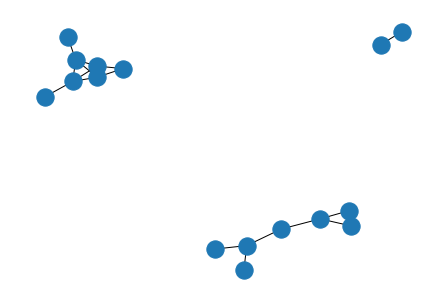

In [ ]:
nx.draw(tempns)
plt.show()

### CONTAIN Algorithm

In [ ]:
X = []
k = 5
tempcon = G.copy()
A = nx.adjacency_matrix(tempcon)
r = matrix_rank(A.todense())

In [ ]:
C = Connectivity(tempcon)
print(C)

110.56696786664698


In [ ]:
# eigen pairs of the adjacency matrix
val,vec =eig(A.todense())
print('E-value:', val)
print('E-vector', vec)

E-value: [ 7.66939878e+00+0.00000000e+00j  3.65793570e+00+0.00000000e+00j
  2.44006955e+00+0.00000000e+00j  1.94035891e+00+0.00000000e+00j
 -2.99907887e+00+0.00000000e+00j -2.64098091e+00+0.00000000e+00j
  1.14585021e+00+0.00000000e+00j -2.26611119e+00+0.00000000e+00j
 -1.98321456e+00+0.00000000e+00j  3.26030924e-01+0.00000000e+00j
  6.26998939e-01+0.00000000e+00j -1.68007801e+00+0.00000000e+00j
 -1.46268504e+00+0.00000000e+00j -2.12845652e-01+0.00000000e+00j
 -7.35770876e-01+0.00000000e+00j -8.25877890e-01+0.00000000e+00j
  6.18033989e-01+0.00000000e+00j -1.61803399e+00+0.00000000e+00j
  3.23592021e-17+0.00000000e+00j -1.00000000e+00+8.45917709e-17j
 -1.00000000e+00-8.45917709e-17j]
E-vector [[ 3.42377833e-01+0.00000000e+00j  5.13491814e-02+0.00000000e+00j
   1.55551068e-01+0.00000000e+00j  3.12428344e-01+0.00000000e+00j
   3.89008512e-01+0.00000000e+00j  2.51290969e-02+0.00000000e+00j
   9.29508177e-03+0.00000000e+00j -1.23257816e-01+0.00000000e+00j
  -1.72023323e-01+0.00000000e+00j 

In [ ]:
def connZ(Z):
  r = matrix_rank(Z)
  newvals,newv = eig(Z)
  # vals = nx.adjacency_spectrum(graph)
  sorted(newvals,reverse = True)
  newvals = newvals[:r]
  # Using natural connectivity as the connectivity measure
  sum = 0
  for val in newvals:
    sum += math.exp(val)
  nc = sum/len(newvals)
  return nc

In [ ]:
def multiply(A,B):
  result = [[sum(a * b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]
  return result                          

In [ ]:
ci = {}
i = 0
for node in tempcon.nodes:
  if node not in ci.keys():
    ci[node] = i
    i += 1

In [ ]:
print(len(vec))

21


In [ ]:
I6 = 0
for j in range(0,k):
    I = {}
    # Calculate impact scores
    for node in list(tempcon.nodes()):
     # Generate a perturbation matrix
      rows = A.shape[0]
      size = rows*rows
      Ap = np.array([0]*size).reshape(rows,rows)
      for neigh in tempcon[node]:
        Ap[ci[node]][ci[neigh]] = -1
        Ap[ci[neigh]][ci[node]] = -1
        # Eigen pairs of a perturbation matrix
      apval,apvec = eig(Ap)
      apvec = apvec[:len(vec)]
      req = np.concatenate((vec, apvec), axis=1)
      # QR decompositon
      Q, R = scipy.linalg.qr(req)
      d = np.concatenate((val, apval), axis=None)
      Z =  multiply(multiply(R , np.diag(d)), R.T)
      I[node] = C - connZ(Z)

    Nodemax = max(I, key= lambda x: I[x], default = 0)
    C = C - I[Nodemax]
    I6 += I[Nodemax]
    print("Node with highest impact score is "+ str(Nodemax))
    I[Nodemax] = -1
    rows = A.shape[0]
    size = rows*rows
    Apnew = np.array([0]*size).reshape(rows,rows)
    for neigh in tempcon[Nodemax]:
       Apnew[ci[node]][ci[neigh]] = -1
       Apnew[ci[neigh]][ci[node]] = -1
     # Eigen pairs of a perturbation matrix
    apvaln,apvecn = eig(Apnew)
    apvecn = apvecn[:len(vec)]
    reqnew = np.concatenate((vec, apvecn), axis=1)
    X.append(Nodemax)
    # QR decompositon
    Qn, Rn = scipy.linalg.qr(reqnew)
    d = np.concatenate((val, apval), axis=None)
    Z =  multiply(multiply(R , np.diag(d)), R.T)
    evz,ecz = eig(Z)
    vec = multiply(Q,ecz)[:r]
    val = evz
    A = A + Apnew
    tempcon.remove_node(Nodemax)
    
print(X)


Node with highest impact score is LUKE
Node with highest impact score is LEIA
Node with highest impact score is C-3PO
Node with highest impact score is CHEWBACCA
Node with highest impact score is R2-D2
['LUKE', 'LEIA', 'C-3PO', 'CHEWBACCA', 'R2-D2']


In [ ]:
print(I6)

30.188516155331357


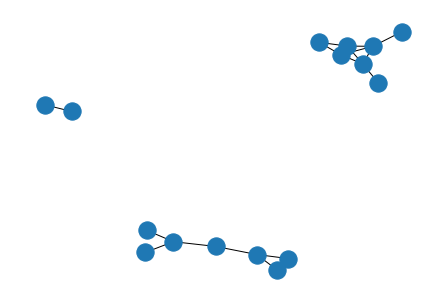

In [ ]:
nx.draw(tempcon)
plt.show()

### MIOBI - first order matrix perturbation

In [ ]:

I7 = 0
tempcon = G.copy()
for j in range(0,k):
    I = {}
    # Calculate impact scores
    for node in list(tempcon.nodes()):
     # Generate a perturbation matrix
      rows = A.shape[0]
      size = rows*rows
      Ap = np.array([0]*size).reshape(rows,rows)
      conn =  Connectivity(tempcon)
      for neigh in tempcon[node]:
        Ap[ci[node]][ci[neigh]] = -1
        Ap[ci[neigh]][ci[node]] = -1
        # Eigen pairs of a perturbation matrix
      B = A + Ap
      r = matrix_rank(B)
      Bval,Bvec = eig(B)
      sorted(Bval,reverse = True)
      Bval = Bval[:r]
      sum = 0
      for val in Bval:
        sum += math.exp(val)
      nc = sum/len(Bval)
      I[node] =  Connectivity(tempG) - Connectivity(G1)
    Nodemax = max(I, key= lambda x: I[x], default = 0)
    I7 += abs(I[Nodemax])
    print("Node with highest impact score is "+ str(Nodemax) + ". Its impact score is "+ str(I[Nodemax]))
    X.append(Nodemax)
    tempcon.remove_node(Nodemax)
    
print(X)


Node with highest impact score is C-3PO. Its impact score is -0.8947519847915082
Node with highest impact score is R2-D2. Its impact score is -0.8947519847915082
Node with highest impact score is LUKE. Its impact score is -0.8947519847915082
Node with highest impact score is OBI-WAN. Its impact score is -0.8947519847915082
Node with highest impact score is LEIA. Its impact score is -0.8947519847915082
['LUKE', 'LEIA', 'C-3PO', 'CHEWBACCA', 'R2-D2', 'C-3PO', 'R2-D2', 'LUKE', 'OBI-WAN', 'LEIA']


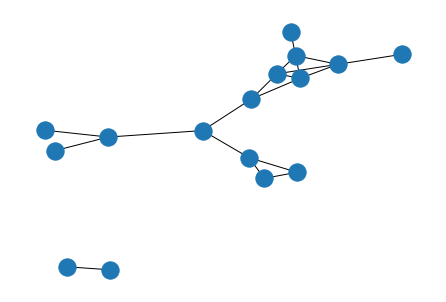

In [ ]:
nx.draw(tempcon)
plt.show()

### MIOBI - S : without updating any eigen pairs

In [ ]:

I7 = 0
tempcon = G.copy()
for j in range(0,k):
    I = {}
    # Calculate impact scores
    for node in list(tempcon.nodes()):
     # Generate a perturbation matrix
      rows = A.shape[0]
      size = rows*rows
      Ap = np.array([0]*size).reshape(rows,rows)
      conn =  Connectivity(tempcon)
      for neigh in tempcon[node]:
        Ap[ci[node]][ci[neigh]] = -1
        Ap[ci[neigh]][ci[node]] = -1
        # Eigen pairs of a perturbation matrix
      B = A + Ap
      r = matrix_rank(B)
      Bval,Bvec = eig(B)
      sorted(Bval,reverse = True)
      Bval = Bval[:r]
      sum = 0
      for val in Bval:
        sum += math.exp(val)
      nc = sum/len(Bval)
      I[node] =  Connectivity(tempG) - Connectivity(G1)
    Nodemax = max(I, key= lambda x: I[x], default = 0)
    I7 += abs(I[Nodemax])
    print("Node with highest impact score is "+ str(Nodemax) + ". Its impact score is "+ str(I[Nodemax]))
    X.append(Nodemax)
    tempcon.remove_node(Nodemax)
    
print(X)


Node with highest impact score is C-3PO. Its impact score is -0.8947519847915082
Node with highest impact score is R2-D2. Its impact score is -0.8947519847915082
Node with highest impact score is LUKE. Its impact score is -0.8947519847915082
Node with highest impact score is OBI-WAN. Its impact score is -0.8947519847915082
Node with highest impact score is LEIA. Its impact score is -0.8947519847915082
['LUKE', 'LEIA', 'C-3PO', 'CHEWBACCA', 'R2-D2', 'C-3PO', 'R2-D2', 'LUKE', 'OBI-WAN', 'LEIA', 'C-3PO', 'R2-D2', 'LUKE', 'OBI-WAN', 'LEIA']


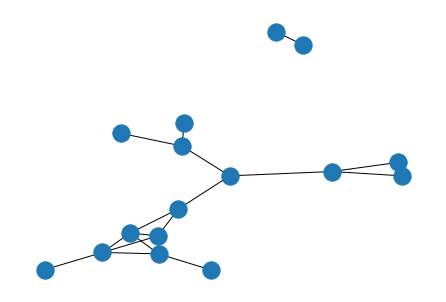

In [ ]:
nx.draw(tempcon)
plt.show()

## Network connectivity optimization using centrality measures

In [ ]:
import operator
GBet = G.copy()
b=nx.betweenness_centrality(GBet)
print(b)

{'C-3PO': 0.06365914786967418, 'R2-D2': 0.013157894736842105, 'LUKE': 0.3285714285714285, 'OBI-WAN': 0.016416040100250627, 'LEIA': 0.23997493734335834, 'HAN': 0.19473684210526315, 'CHEWBACCA': 0.03922305764411027, 'DODONNA': 0.012280701754385963, 'DARTH VADER': 0.013157894736842105, 'CAMIE': 0.0, 'BIGGS': 0.03552631578947368, 'BERU': 0.006015037593984962, 'OWEN': 0.0, 'MOTTI': 0.0, 'TARKIN': 0.0, 'GREEDO': 0.0, 'JABBA': 0.0, 'GOLD LEADER': 0.003508771929824561, 'WEDGE': 0.003508771929824561, 'RED LEADER': 0.03552631578947368, 'RED TEN': 0.0}


In [ ]:
GBet = G.copy()
I = {}
k = 5
b=nx.betweenness_centrality(G)
sorted_b = dict( sorted(b.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_b)
for node in sorted_b:
  # print(node)
  if k > 0:
    I[node] = sorted_b[node]
    k = k-1
    GBet.remove_node(node)


{'LUKE': 0.3285714285714285, 'LEIA': 0.23997493734335834, 'HAN': 0.19473684210526315, 'C-3PO': 0.06365914786967418, 'CHEWBACCA': 0.03922305764411027, 'BIGGS': 0.03552631578947368, 'RED LEADER': 0.03552631578947368, 'OBI-WAN': 0.016416040100250627, 'R2-D2': 0.013157894736842105, 'DARTH VADER': 0.013157894736842105, 'DODONNA': 0.012280701754385963, 'BERU': 0.006015037593984962, 'GOLD LEADER': 0.003508771929824561, 'WEDGE': 0.003508771929824561, 'CAMIE': 0.0, 'OWEN': 0.0, 'MOTTI': 0.0, 'TARKIN': 0.0, 'GREEDO': 0.0, 'JABBA': 0.0, 'RED TEN': 0.0}


In [ ]:
removed_nodes = print('removed nodes',I)

removed nodes {'LUKE': 0.3285714285714285, 'LEIA': 0.23997493734335834, 'HAN': 0.19473684210526315, 'C-3PO': 0.06365914786967418, 'CHEWBACCA': 0.03922305764411027}


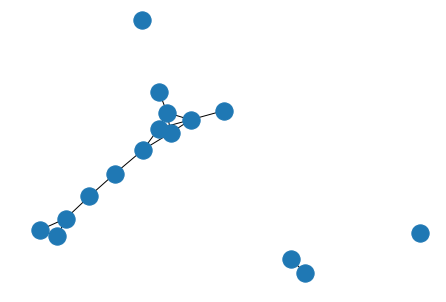

In [ ]:
nx.draw(GBet)
plt.show()

In [ ]:
GBet1 = G.copy()
I = {}
k = 5
print('removed nodes :')
for j in range(k):
   
    b = nx.betweenness_centrality(GBet1)
    cmax = max(b, key= lambda x: b[x], default = 0)
    I[cmax] = b[cmax]
    print(cmax,":",b[cmax])
    GBet1.remove_node(cmax)
    

removed nodes :
LUKE : 0.3285714285714285
LEIA : 0.3450292397660819
C-3PO : 0.47058823529411764
DODONNA : 0.39705882352941174
HAN : 0.10833333333333334


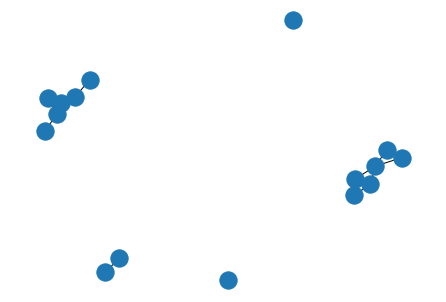

In [ ]:
nx.draw(GBet1)
plt.show()

In [ ]:
I2 = I2/I1
I3 = I3/I1
I4 = I4/I1
I5 = I5/I1
I7 = I7/I1
I8 = I8/I1
I6 = I6/I1
I1 = I1/I1

<BarContainer object of 8 artists>

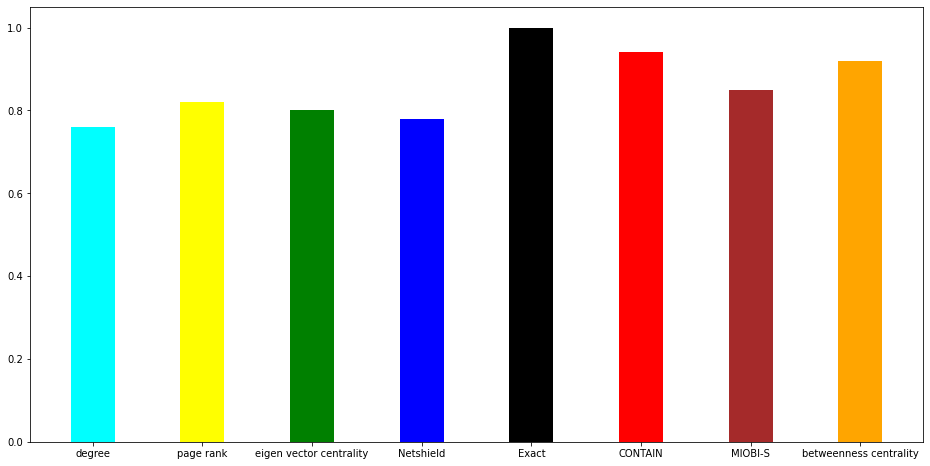

In [ ]:
data = {'degree':I2, 'page rank':I3, 'eigen vector centrality':I4,
        'Netshield':I5,'Exact' : I1, 'CONTAIN' : I6, 'MIOBI-S' : I7, 'betweenness centrality' : I8}
labels = list(data.keys())
scores = list(data.values())
  
fig = plt.figure(figsize = (16, 8))
 
# creating the bar plot
plt.bar(labels, scores, color =['cyan', 'yellow', 'green', 'blue', 'black','red','brown','orange'],
        width = 0.4)